In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
    array, cumsum, dot, transpose, diagonal, floor


In [20]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")
outdir = './R2_R3_compare/'


In [21]:
E7_rg_file = './R2_R3_EPI-7170/rg.dat'
E2_rg_file = './R2_R3_EPI-002/rg.dat'
E7_rg = np.loadtxt(E7_rg_file)
E2_rg = np.loadtxt(E2_rg_file)
E7dir = './R2_R3_EPI-7170/'
E2dir = './R2_R3_EPI-002/'
apodir = './R2_R3_APO/'

E7_byres_traj = np.loadtxt(E7dir+'contacts.traj.dat').astype(int)
E2_byres_traj = np.loadtxt(E2dir+'contacts.traj.dat').astype(int)
E7_contacts_by_frame = np.sum(E7_byres_traj, axis=1)
E2_contacts_by_frame = np.sum(E2_byres_traj, axis=1)


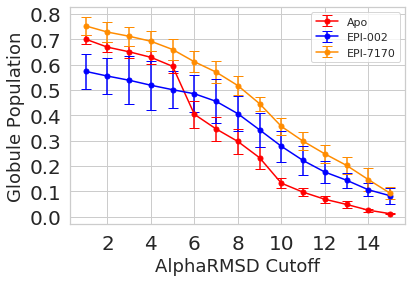

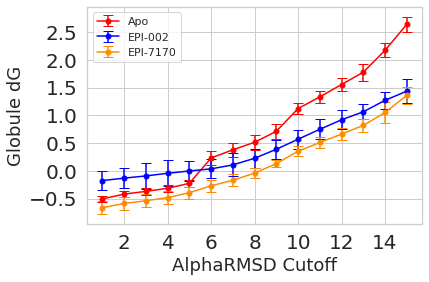

[[1.000 0.700 0.018]
 [2.000 0.668 0.019]
 [3.000 0.650 0.024]
 [4.000 0.628 0.026]
 [5.000 0.593 0.027]
 [6.000 0.404 0.052]
 [7.000 0.346 0.049]
 [8.000 0.296 0.048]
 [9.000 0.232 0.044]
 [10.000 0.132 0.020]
 [11.000 0.097 0.017]
 [12.000 0.069 0.014]
 [13.000 0.048 0.013]
 [14.000 0.026 0.006]
 [15.000 0.012 0.003]] [[1.000 0.573 0.070]
 [2.000 0.554 0.071]
 [3.000 0.538 0.095]
 [4.000 0.518 0.096]
 [5.000 0.501 0.072]
 [6.000 0.485 0.072]
 [7.000 0.455 0.087]
 [8.000 0.406 0.069]
 [9.000 0.342 0.066]
 [10.000 0.278 0.061]
 [11.000 0.221 0.056]
 [12.000 0.176 0.045]
 [13.000 0.144 0.030]
 [14.000 0.106 0.026]
 [15.000 0.083 0.031]] [[1.000 0.752 0.036]
 [2.000 0.728 0.038]
 [3.000 0.711 0.038]
 [4.000 0.692 0.040]
 [5.000 0.659 0.041]
 [6.000 0.611 0.042]
 [7.000 0.570 0.042]
 [8.000 0.517 0.037]
 [9.000 0.446 0.027]
 [10.000 0.356 0.034]
 [11.000 0.298 0.034]
 [12.000 0.248 0.035]
 [13.000 0.202 0.035]
 [14.000 0.146 0.046]
 [15.000 0.093 0.024]] [[1.000 -0.505 0.052]
 [2.000 -0.4

<Figure size 432x288 with 0 Axes>

In [22]:
globpop = 'Pop.vs.Sacut.dat'
globdg = 'dGglob.vs.Sacut.dat'

E7_globpop = np.loadtxt(E7dir+globpop)
E2_globpop = np.loadtxt(E2dir+globpop)
Apo_globpop = np.loadtxt(apodir+globpop)

plt.errorbar(Apo_globpop[:, 0], Apo_globpop[:, 1], yerr=Apo_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='red', label='Apo')
plt.errorbar(E2_globpop[:, 0], E2_globpop[:, 1], yerr=E2_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7_globpop[:, 0], E7_globpop[:, 1], yerr=E7_globpop[:, 2],
             marker='o', markersize=5, capsize=5, color='darkorange', label='EPI-7170')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Globule Population', fontsize=18)
plt.xlabel('AlphaRMSD Cutoff', fontsize=18)
plt.legend(loc='upper right')
plt.savefig(outdir+'E2.E7.Apo.GlobulePopV_Sacut.pdf', bbox_inches='tight')
plt.show()
plt.clf()

E7_globdG = np.loadtxt(E7dir+globdg)
E2_globdG = np.loadtxt(E2dir+globdg)
Apo_globdG = np.loadtxt(apodir+globdg)

plt.errorbar(Apo_globdG[:, 0], Apo_globdG[:, 1], yerr=Apo_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='red', label='Apo')
plt.errorbar(E2_globdG[:, 0], E2_globdG[:, 1], yerr=E2_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7_globdG[:, 0], E7_globdG[:, 1], yerr=E7_globdG[:, 2],
             marker='o', markersize=5, capsize=5, color='darkorange', label='EPI-7170')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Globule dG', fontsize=18)
plt.xlabel('AlphaRMSD Cutoff', fontsize=18)
plt.legend(loc='upper left')
plt.savefig(outdir+'E2.E7.Apo.GlobdG_V_Sacut.pdf', bbox_inches='tight')
plt.show()
plt.clf()

print(Apo_globpop, E2_globpop, E7_globpop, Apo_globdG, E2_globdG, E7_globdG)

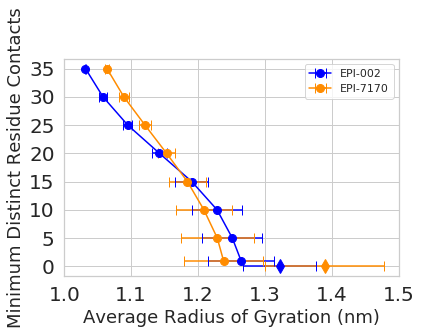

In [23]:
contacts = [1, 5, 10, 15, 20, 25, 30, 35]
E7_contact = []
E2_contact = []
E7rg = []
E2rg = []
E7rg_sd = []
E2rg_sd = []

frames = np.where(E7_contacts_by_frame == 0)[0]
E7rg0 = np.average(E7_rg[frames])
E7rg0_var = np.var(E7_rg[frames])

frames = np.where(E2_contacts_by_frame == 0)[0]
E2rg0 = np.average(E2_rg[frames])
E2rg0_var = np.var(E2_rg[frames])

for i in contacts:
    frames = np.where(E7_contacts_by_frame >= i)[0]
    E7_contact.append(i)
    E7rg.append(np.average(E7_rg[frames]))
    E7rg_sd.append(np.var(E7_rg[frames]))

    frames = np.where(E2_contacts_by_frame >= i)[0]
    E2_contact.append(i)
    E2rg.append(np.average(E2_rg[frames]))
    E2rg_sd.append(np.var(E2_rg[frames]))

plt.errorbar(E2rg0, 0, xerr=E2rg0_var, marker='d',
             markersize=10, capsize=5, color='blue')
plt.errorbar(E7rg0, 0, xerr=E7rg0_var, marker='d',
             markersize=10, capsize=5, color='darkorange')

plt.errorbar(E2rg, E2_contact, xerr=E2rg_sd, marker='o',
             markersize=8, capsize=5, color='blue', label='EPI-002')
plt.errorbar(E7rg, E7_contact, xerr=E7rg_sd, marker='o',
             markersize=8, capsize=5, color='darkorange', label='EPI-7170')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1.0, 1.5)
plt.ylabel('Minimum Distinct Residue Contacts', fontsize=18)
plt.xlabel('Average Radius of Gyration (nm)', fontsize=18)
plt.legend(loc='upper right')
plt.savefig(outdir+'E2.E7.rgVcontacts.pdf', bbox_inches='tight')
plt.show()


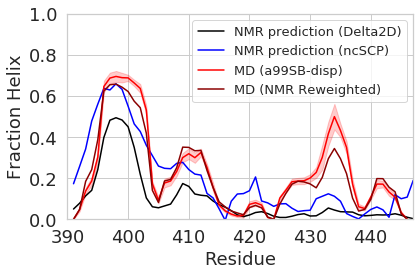

In [24]:
sns.set(style='whitegrid')

file = 'Hprop.err.dat'
boundfile = 'Hprop.bound.err.dat'
Helix_apo = np.loadtxt(apodir+file)
Helix_E2 = np.loadtxt(E2dir+file)
Helix_E7 = np.loadtxt(E7dir+file)
Helix_E2_bound = np.loadtxt(E2dir+boundfile)
Helix_E7_bound = np.loadtxt(E7dir+boundfile)

Helix_reweight = np.loadtxt(
    './R2_R3_APO/Hprop.reweight.dat')
d2d_helix = np.loadtxt(
    './Reweight_Files/AF1.d2d.Hpred.R2R3.noseq.dat')
ncSCP_helix = np.loadtxt(
    './Reweight_Files//R2R3.AF1.ncSCP.dat')


Apo_u = Helix_apo[:, 1]+Helix_apo[:, 2]
Apo_l = Helix_apo[:, 1]-Helix_apo[:, 2]
E2_u = Helix_E2[:, 1]+Helix_E2[:, 2]
E2_l = Helix_E2[:, 1]-Helix_E2[:, 2]
E7_u = Helix_E7[:, 1]+Helix_E7[:, 2]
E7_l = Helix_E7[:, 1]-Helix_E7[:, 2]

sns.lineplot(x=d2d_helix[:, 0], y=d2d_helix[:, 1],
             color='black', label='NMR prediction (Delta2D)')
sns.lineplot(x=ncSCP_helix[:, 0], y=ncSCP_helix[:, 1],
             color='blue', label='NMR prediction (ncSCP)')
sns.lineplot(x=Helix_apo[:, 0], y=Helix_apo[:, 1],
             color='red', label='MD (a99SB-disp)')
sns.lineplot(x=Helix_reweight[:, 0], y=Helix_reweight[:, 1],
             color='darkred', linestyle='dashed', label='MD (NMR Reweighted)')

plt.fill_between(Helix_apo[:, 0], Apo_u, Apo_l, color='red', alpha=0.2)

plt.ylim(0.0, 1.0)

plt.xlim(390, 447)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('Fraction Helix', fontsize=18)
plt.legend(loc='upper right', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.savefig(outdir+'Hcomp.apo.NMR.pdf', bbox_inches='tight')


[[391.000 0.000 0.000]
 [392.000 0.047 0.009]
 [393.000 0.138 0.014]
 [394.000 0.186 0.020]
 [395.000 0.302 0.021]
 [396.000 0.646 0.028]
 [397.000 0.687 0.026]
 [398.000 0.695 0.027]
 [399.000 0.689 0.023]
 [400.000 0.688 0.015]
 [401.000 0.663 0.016]
 [402.000 0.637 0.021]
 [403.000 0.531 0.021]
 [404.000 0.173 0.012]
 [405.000 0.093 0.016]
 [406.000 0.176 0.021]
 [407.000 0.186 0.021]
 [408.000 0.232 0.022]
 [409.000 0.300 0.023]
 [410.000 0.319 0.026]
 [411.000 0.300 0.025]
 [412.000 0.325 0.018]
 [413.000 0.253 0.016]
 [414.000 0.156 0.021]
 [415.000 0.070 0.009]
 [416.000 0.041 0.007]
 [417.000 0.025 0.007]
 [418.000 0.016 0.005]
 [419.000 0.018 0.011]
 [420.000 0.073 0.015]
 [421.000 0.081 0.015]
 [422.000 0.069 0.012]
 [423.000 0.009 0.002]
 [424.000 0.000 0.000]
 [425.000 0.103 0.010]
 [426.000 0.142 0.013]
 [427.000 0.183 0.015]
 [428.000 0.186 0.015]
 [429.000 0.188 0.017]
 [430.000 0.201 0.018]
 [431.000 0.228 0.026]
 [432.000 0.301 0.060]
 [433.000 0.416 0.059]
 [434.000 0

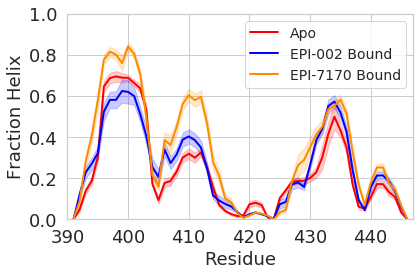

In [25]:
sns.set(style='whitegrid')

Apo_u = Helix_apo[:, 1]+Helix_apo[:, 2]
Apo_l = Helix_apo[:, 1]-Helix_apo[:, 2]
E2_u = Helix_E2_bound[:, 1]+Helix_E2_bound[:, 2]
E2_l = Helix_E2_bound[:, 1]-Helix_E2_bound[:, 2]
E7_u = Helix_E7_bound[:, 1]+Helix_E7_bound[:, 2]
E7_l = Helix_E7_bound[:, 1]-Helix_E7_bound[:, 2]


sns.lineplot(x=Helix_apo[:, 0], y=Helix_apo[:, 1],
             color='red', label='Apo', linewidth=2)
sns.lineplot(x=Helix_E2_bound[:, 0], y=Helix_E2_bound[:, 1],
             color='blue', label='EPI-002 Bound', linewidth=2)
sns.lineplot(x=Helix_E7_bound[:, 0], y=Helix_E7_bound[:, 1],
             color='darkorange', label='EPI-7170 Bound', linewidth=2)

plt.fill_between(Helix_apo[:, 0], Apo_u, Apo_l, color='red', alpha=0.2)
plt.fill_between(Helix_E2_bound[:, 0], E2_u, E2_l, color='blue', alpha=0.2)
plt.fill_between(Helix_E7_bound[:, 0], E7_u,
                 E7_l, color='darkorange', alpha=0.2)

plt.ylim(0.0, 1.0)

plt.xlim(390, 447)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('Fraction Helix', fontsize=18)
plt.legend(loc='upper right', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(outdir+'Hcomp.apo.e2.e7.pdf', bbox_inches='tight')
print(Helix_apo, Helix_E2_bound, Helix_E7_bound)

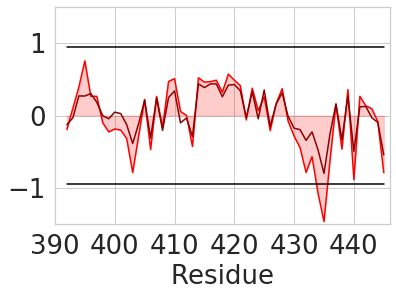

<Figure size 432x288 with 0 Axes>

In [26]:
CA_deviation = np.loadtxt(
    './R2_R3_APO/CA.initialVexp.dat')
CA_reweight_deviation = np.loadtxt(
    './R2_R3_APO/CA.reweightVexp.dat')
CAexpVsim = CA_deviation
upper = np.copy(CAexpVsim)
lower = np.copy(CAexpVsim)
zeros = np.copy(CAexpVsim)

for i in range(0, len(upper[:, 0])):
    upper[i, 1] = 0.94
    lower[i, 1] = -0.94
    zeros[i, 1] = 0

sns.set(style='whitegrid')
sns.lineplot(x=CAexpVsim[:, 0], y=-CAexpVsim[:, 1], color='red')
sns.lineplot(x=CA_reweight_deviation[:, 0], y=-
             CA_reweight_deviation[:, 1], color='darkred', linestyle='dashed')
sns.lineplot(x=upper[:, 0], y=upper[:, 1], color='black')
sns.lineplot(x=lower[:, 0], y=lower[:, 1], color='black')
plt.fill_between(CAexpVsim[:, 0], -CAexpVsim[:, 1],
                 zeros[i, 1], color='red', alpha=0.2)
plt.ylim(-1.5, 1.5)
plt.xlim(390, 446)
plt.xticks(fontsize=26)
plt.yticks([-1.0, 0, 1.0], fontsize=26)
plt.xlabel('Residue', fontsize=26)

plt.grid(True)
plt.savefig(outdir+'CA.expCS_v_MD.pdf', bbox_inches='tight')
plt.show()
plt.clf()


[[0.500 0.561 -0.090]
 [1.500 0.716 -0.031]
 [2.500 1.034 -0.082]
 [3.500 0.890 -0.136]
 [4.500 0.728 -0.104]
 [5.500 0.000 -0.203]
 [6.500 0.593 -0.166]
 [7.500 0.717 -0.146]
 [8.500 0.624 -0.135]
 [9.500 0.410 -0.211]
 [10.500 1.004 -0.156]
 [11.500 1.138 -0.126]
 [12.500 1.299 -0.105]
 [13.500 1.235 -0.265]
 [14.500 1.497 -0.282]
 [15.500 2.030 -0.243]
 [16.500 2.236 -0.265]
 [17.500 2.823 -0.281]
 [18.500 3.144 -0.252]
 [19.500 3.744 -0.448]
 [20.500 3.770 -0.379]
 [21.500 4.648 -0.533]
 [22.500 4.948 -0.533]
 [23.500 5.581 -0.533]
 [24.500 7.321 nan]] [[0.500 0.000 -0.118]
 [1.500 0.737 -0.148]
 [2.500 0.954 -0.116]
 [3.500 0.985 -0.166]
 [4.500 0.998 -0.202]
 [5.500 1.166 -0.158]
 [6.500 0.949 -0.148]
 [7.500 0.649 -0.122]
 [8.500 0.548 -0.150]
 [9.500 0.642 -0.148]
 [10.500 0.733 -0.121]
 [11.500 0.879 -0.185]
 [12.500 1.078 -0.166]
 [13.500 0.995 -0.217]
 [14.500 1.224 -0.235]
 [15.500 1.413 -0.210]
 [16.500 1.356 -0.218]
 [17.500 2.145 -0.256]
 [18.500 2.351 -0.438]
 [19.500 1

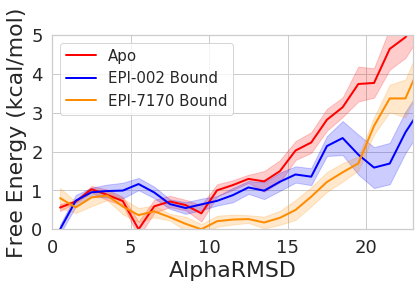

In [27]:
# SA_dG_1d:
file = 'Sa.bound.dG.dat'
Rg_apo = np.loadtxt(apodir+'Sa_dg.dat')
Rg_E2 = np.loadtxt(E2dir+'Sa.bound.dG.dat')
Rg_E7 = np.loadtxt(E7dir+'Sa.bound.dG.dat')

plt.clf()
plt.plot(Rg_apo[:, 0], Rg_apo[:, 1], c='red', label='Apo', linewidth=2)
plt.plot(Rg_E2[:, 0], Rg_E2[:, 1], c='blue',
         label='EPI-002 Bound', linewidth=2)
plt.plot(Rg_E7[:, 0], Rg_E7[:, 1], c='darkorange',
         label='EPI-7170 Bound', linewidth=2)

plt.fill_between(Rg_apo[:, 0], Rg_apo[:, 1]-Rg_apo[:, 2],
                 Rg_apo[:, 1]+Rg_apo[:, 2], color='red', alpha=0.2)
plt.fill_between(Rg_E2[:, 0], Rg_E2[:, 1]-Rg_E2[:, 2],
                 Rg_E2[:, 1]+Rg_E2[:, 2], color='blue', alpha=0.2)
plt.fill_between(Rg_E7[:, 0], Rg_E7[:, 1]-Rg_E7[:, 2],
                 Rg_E7[:, 1]+Rg_E7[:, 2], color='darkorange', alpha=0.2)
plt.legend()

plt.ylim(0, 5)
plt.xlim(0, 23)
plt.xlabel('AlphaRMSD', size=22)
plt.ylabel('Free Energy (kcal/mol)', size=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='18')
plt.yticks(size='18')
plt.tight_layout()
plt.legend(loc='upper left', fontsize=15)

plt.savefig('%s/Sa.dG.compare.apo.E2.E7.pdf' % outdir)
print(Rg_apo, Rg_E2, Rg_E7)

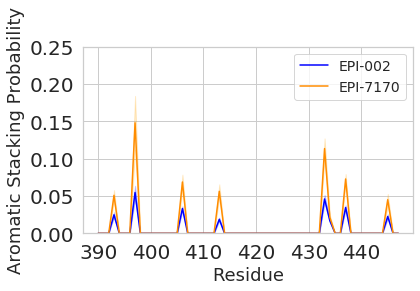

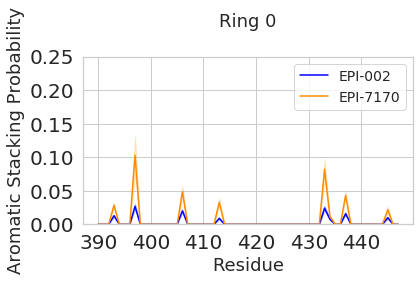

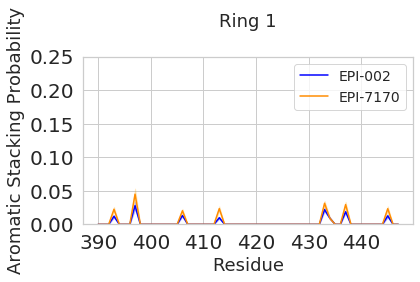

[[390.000 0.000 0.000]
 [391.000 0.000 0.000]
 [392.000 0.000 0.000]
 [393.000 0.012 0.002]
 [394.000 0.000 0.000]
 [395.000 0.000 0.000]
 [396.000 0.000 0.000]
 [397.000 0.028 0.006]
 [398.000 0.000 0.000]
 [399.000 0.000 0.000]
 [400.000 0.000 0.000]
 [401.000 0.000 0.000]
 [402.000 0.000 0.000]
 [403.000 0.000 0.000]
 [404.000 0.000 0.000]
 [405.000 0.000 0.000]
 [406.000 0.013 0.001]
 [407.000 0.000 0.000]
 [408.000 0.000 0.000]
 [409.000 0.000 0.000]
 [410.000 0.000 0.000]
 [411.000 0.000 0.000]
 [412.000 0.000 0.000]
 [413.000 0.010 0.002]
 [414.000 0.000 0.000]
 [415.000 0.000 0.000]
 [416.000 0.000 0.000]
 [417.000 0.000 0.000]
 [418.000 0.000 0.000]
 [419.000 0.000 0.000]
 [420.000 0.000 0.000]
 [421.000 0.000 0.000]
 [422.000 0.000 0.000]
 [423.000 0.000 0.000]
 [424.000 0.000 0.000]
 [425.000 0.000 0.000]
 [426.000 0.000 0.000]
 [427.000 0.000 0.000]
 [428.000 0.000 0.000]
 [429.000 0.000 0.000]
 [430.000 0.000 0.000]
 [431.000 0.000 0.000]
 [432.000 0.000 0.000]
 [433.000 0

<Figure size 432x288 with 0 Axes>

In [28]:
# New p+t-stacking Defintion
file = 'aromatic_stacking.fraction.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.pdf' % outdir)
plt.show()
plt.clf()

file = 'aromatic_stacking.fraction.r0.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.title("Ring 0", size=18, pad=30)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.r0.pdf' % outdir)
plt.show()
plt.clf()
file = 'aromatic_stacking.fraction.r1.be.dat'
E2_stack = np.loadtxt(E2dir+file)
E7_stack = np.loadtxt(E7dir+file)

plt.plot(E2_stack[:, 0], E2_stack[:, 1], c='blue', label='EPI-002')
plt.plot(E7_stack[:, 0], E7_stack[:, 1], c='darkorange', label='EPI-7170')
plt.fill_between(E2_stack[:, 0], E2_stack[:, 1]+E2_stack[:, 2],
                 E2_stack[:, 1]-E2_stack[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_stack[:, 0], E7_stack[:, 1]+E7_stack[:, 2],
                 E7_stack[:, 1]-E7_stack[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.25)
plt.title("Ring 1", size=18, pad=30)
plt.xlabel('Residue', size=18)
plt.ylabel('Aromatic Stacking Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.stacking.r1.pdf' % outdir)
plt.show()
plt.clf()

print(E2_stack, E7_stack)

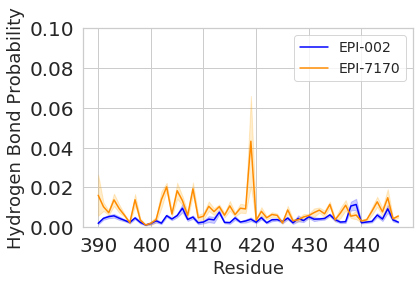

In [29]:
# 'HbondFraction.bound.dat'
# Compare Stacking
file = 'hbond_fraction.be.dat'
E2_Hbond = np.loadtxt(E2dir+file)
E7_Hbond = np.loadtxt(E7dir+file)

plt.plot(E2_Hbond[:, 0], E2_Hbond[:, 1], c='blue', label='EPI-002')
plt.plot(E7_Hbond[:, 0], E7_Hbond[:, 1], c='darkorange', label='EPI-7170')

plt.fill_between(E2_Hbond[:, 0], E2_Hbond[:, 1]+E2_Hbond[:, 2],
                 E2_Hbond[:, 1]-E2_Hbond[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_Hbond[:, 0], E7_Hbond[:, 1]+E7_Hbond[:, 2],
                 E7_Hbond[:, 1]-E7_Hbond[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.10)
plt.xlabel('Residue', size=18)
plt.ylabel('Hydrogen Bond Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.HBond.pdf' % outdir)


[[391.000 0.064 0.010]
 [392.000 0.105 0.012]
 [393.000 0.077 0.006]
 [394.000 0.138 0.013]
 [395.000 0.105 0.013]
 [396.000 0.105 0.017]
 [397.000 0.119 0.019]
 [398.000 0.197 0.025]
 [399.000 0.125 0.018]
 [400.000 0.097 0.018]
 [401.000 0.133 0.019]
 [402.000 0.139 0.015]
 [403.000 0.087 0.009]
 [404.000 0.089 0.011]
 [405.000 0.128 0.014]
 [406.000 0.095 0.009]
 [407.000 0.153 0.012]
 [408.000 0.087 0.008]
 [409.000 0.076 0.007]
 [410.000 0.120 0.011]
 [411.000 0.092 0.010]
 [412.000 0.079 0.009]
 [413.000 0.114 0.014]
 [414.000 0.104 0.010]
 [415.000 0.062 0.006]
 [416.000 0.076 0.009]
 [417.000 0.065 0.006]
 [418.000 0.077 0.010]
 [419.000 0.081 0.007]
 [420.000 0.079 0.007]
 [421.000 0.101 0.013]
 [422.000 0.075 0.010]
 [423.000 0.069 0.007]
 [424.000 0.066 0.006]
 [425.000 0.084 0.010]
 [426.000 0.098 0.013]
 [427.000 0.076 0.010]
 [428.000 0.076 0.007]
 [429.000 0.079 0.007]
 [430.000 0.101 0.011]
 [431.000 0.112 0.012]
 [432.000 0.089 0.010]
 [433.000 0.089 0.007]
 [434.000 0

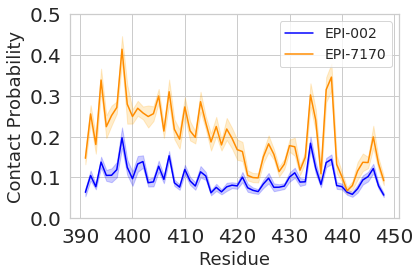

In [30]:
# 'HbondFraction.bound.dat'
# Compare Stacking
file = 'contact.be.pyblock.dat'
E2_Hbond = np.loadtxt(E2dir+file)
E7_Hbond = np.loadtxt(E7dir+file)

plt.plot(E2_Hbond[:, 0], E2_Hbond[:, 1], c='blue', label='EPI-002')
plt.plot(E7_Hbond[:, 0], E7_Hbond[:, 1], c='darkorange', label='EPI-7170')

plt.fill_between(E2_Hbond[:, 0], E2_Hbond[:, 1]+E2_Hbond[:, 2],
                 E2_Hbond[:, 1]-E2_Hbond[:, 2], alpha=0.2, color='blue')
plt.fill_between(E7_Hbond[:, 0], E7_Hbond[:, 1]+E7_Hbond[:, 2],
                 E7_Hbond[:, 1]-E7_Hbond[:, 2], alpha=0.2, color='orange')


plt.ylim(0, 0.50)
plt.xlabel('Residue', size=18)
plt.ylabel('Contact Probability', size=18)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
plt.legend(loc='upper right', fontsize=14)
plt.savefig('%s/E2.E7.contact.pdf' % outdir)

print(E2_Hbond, E7_Hbond)

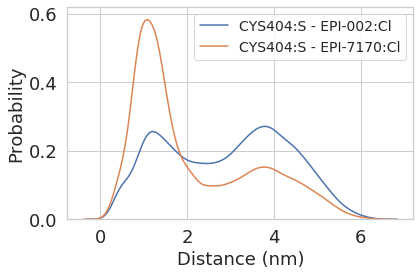

In [31]:
# from scipy.stats import norm

file = 'CL-S.distance.dat'
E2_CLS_dist = np.loadtxt(E2dir+file)
E7_CLS_dist = np.loadtxt(E7dir+file)
# print(E7_CLS_dist)
# plt.hist(E7_CLS_dist, density = True)
# sns.kdeplot(data = E2_CLS_dist, label = 'CYS404:S - EPI-002:Cl', common_norm=False)
# sns.kdeplot(data = E7_CLS_dist, label = 'CYS404:S - EPI-7170:Cl', common_norm=False)
sns.distplot(E2_CLS_dist, label = 'CYS404:S - EPI-002:Cl',hist=False, bins = 5)
sns.distplot(E7_CLS_dist, label = 'CYS404:S - EPI-7170:Cl',hist=False, bins = 5)
plt.xlabel('Distance (nm)', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.ylim(0, 0.62)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig(outdir+'CL-S.E2.E7.histogram.png')
plt.savefig(outdir+'CL-S.E2.E7.histogram.pdf')


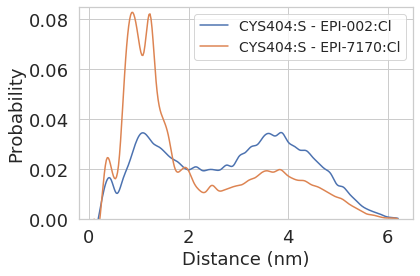

In [33]:
from scipy.interpolate import make_interp_spline

file = 'CL-S.distance.dat'
E2_CLS_dist = np.loadtxt(E2dir+file)
E7_CLS_dist = np.loadtxt(E7dir+file)

histo_E2 = plt.hist(E2_CLS_dist, bins=50, alpha=0.5, label='EPI-002')
histo_E7 = plt.hist(E7_CLS_dist, bins=50, alpha=0.5, label='EPI-7170')
E2_norm = histo_E2[0]/np.sum(histo_E2[0])
E7_norm = histo_E7[0]/np.sum(histo_E7[0])
plt.clf()


def make_smooth(x, y):
    xnew = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(xnew)
    return xnew, y_smooth

x1 = histo_E2[1][0:-1]
x2 = histo_E7[1][0:-1]
y1 = E2_norm
y2 = E7_norm

X1_, Y1_ = make_smooth(x1, y1)
X2_, Y2_ = make_smooth(x2, y2)
plt.plot(X1_, Y1_, label = 'CYS404:S - EPI-002:Cl')
plt.plot(X2_, Y2_, label = 'CYS404:S - EPI-7170:Cl')
# plt.plot(X2_[6:], Y2_[6:], label = 'CYS404:S - EPI-7170:Cl')
plt.xlabel('Distance (nm)', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.legend(loc='upper right',fontsize=14)
plt.tick_params(labelsize=18)
plt.ylim(0, 0.085)
plt.tight_layout()
plt.savefig(outdir+'CL-S.E2.E7.count.smooth.png')
plt.savefig(outdir+'CL-S.E2.E7.count.smooth.pdf')
